# 1. EDA

## (1) 데이터 불러오기

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./CVD_cleaned.csv')
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [3]:
health = data.copy()

## (2) 데이터 확인하기

In [5]:
# Null 개수 확인하기

health.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [6]:
# 데이터 정보 확인

health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

- Numerical Data : Height_(cm), Weight_(kg), BMI, Alcohol_Consumption, Fruit_Consumption, Green_Vegetables_Consumption, FriedPotato_Consumption
- Categorical Data : General_Health, Checkup, Exercise, Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Diabetes, Arthritis, Sex, Age_Category, Smoking_History

In [7]:
health.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0


In [8]:
health.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

### Categorical Data

In [9]:
# Yes/No

print('Exercise : ', health['Exercise'].unique())
print('Heart_Disease : ', health['Heart_Disease'].unique())
print('Skin_Cancer : ', health['Skin_Cancer'].unique())
print('Arthritis : ', health['Arthritis'].unique())
print('Smoking_History : ', health['Smoking_History'].unique())
print('Other_Cancer : ', health['Other_Cancer'].unique())
print('Depression : ', health['Depression'].unique())
print('Diabetes : ', health['Diabetes'].unique())

Exercise :  ['No' 'Yes']
Heart_Disease :  ['No' 'Yes']
Skin_Cancer :  ['No' 'Yes']
Arthritis :  ['Yes' 'No']
Smoking_History :  ['Yes' 'No']
Other_Cancer :  ['No' 'Yes']
Depression :  ['No' 'Yes']
Diabetes :  ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']


In [10]:
# 나머지

print('General_Health : ' ,health['General_Health'].unique())
print('Checkup : ' ,health['Checkup'].unique())
print('Sex : ', health['Sex'].unique())
print('Age_Category : ', health['Age_Category'].unique())


General_Health :  ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup :  ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Sex :  ['Female' 'Male']
Age_Category :  ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']


### Numerical Data
- Height_(cm)
- Weight_(kg)
- BMI
- Consumpthion : 월별 섭취 횟수
    - Alcohol_Consumption
    - Fruit_Consumption
    - Green_Vegetables_Consumption
    - FriedPotato_Consumption

### 변수들 간의 상관관계 살펴보기

In [16]:
health.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [21]:
health[['Height_(cm)', 'Weight_(kg)', 'BMI', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption' ]].corr()

,Height_(cm),Weight_(kg),BMI,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Height_(cm),1.000000,0.472186,-0.027408,-0.045911,-0.030148,0.108795
Weight_(kg),0.472186,1.000000,0.859699,-0.090612,-0.075904,0.096351
BMI,-0.027408,0.859699,1.000000,-0.076611,-0.070640,0.048366
Fruit_Consumption,-0.045911,-0.090612,-0.076611,1.000000,0.270430,-0.060311
Green_Vegetables_Consumption,-0.030148,-0.075904,-0.070640,0.270430,1.000000,0.003180
FriedPotato_Consumption,0.108795,0.096351,0.048366,-0.060311,0.003180,1.000000


<Axes: >

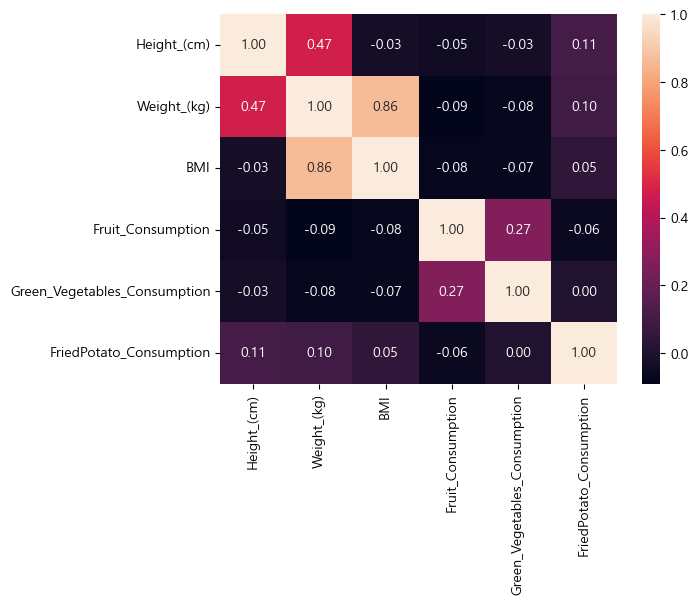

In [114]:
sns.heatmap(health[['Height_(cm)', 'Weight_(kg)', 'BMI', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption' ]].corr(),
           annot = True,
           fmt = '.2f')

### Boxplot으로 outlier 확인하기

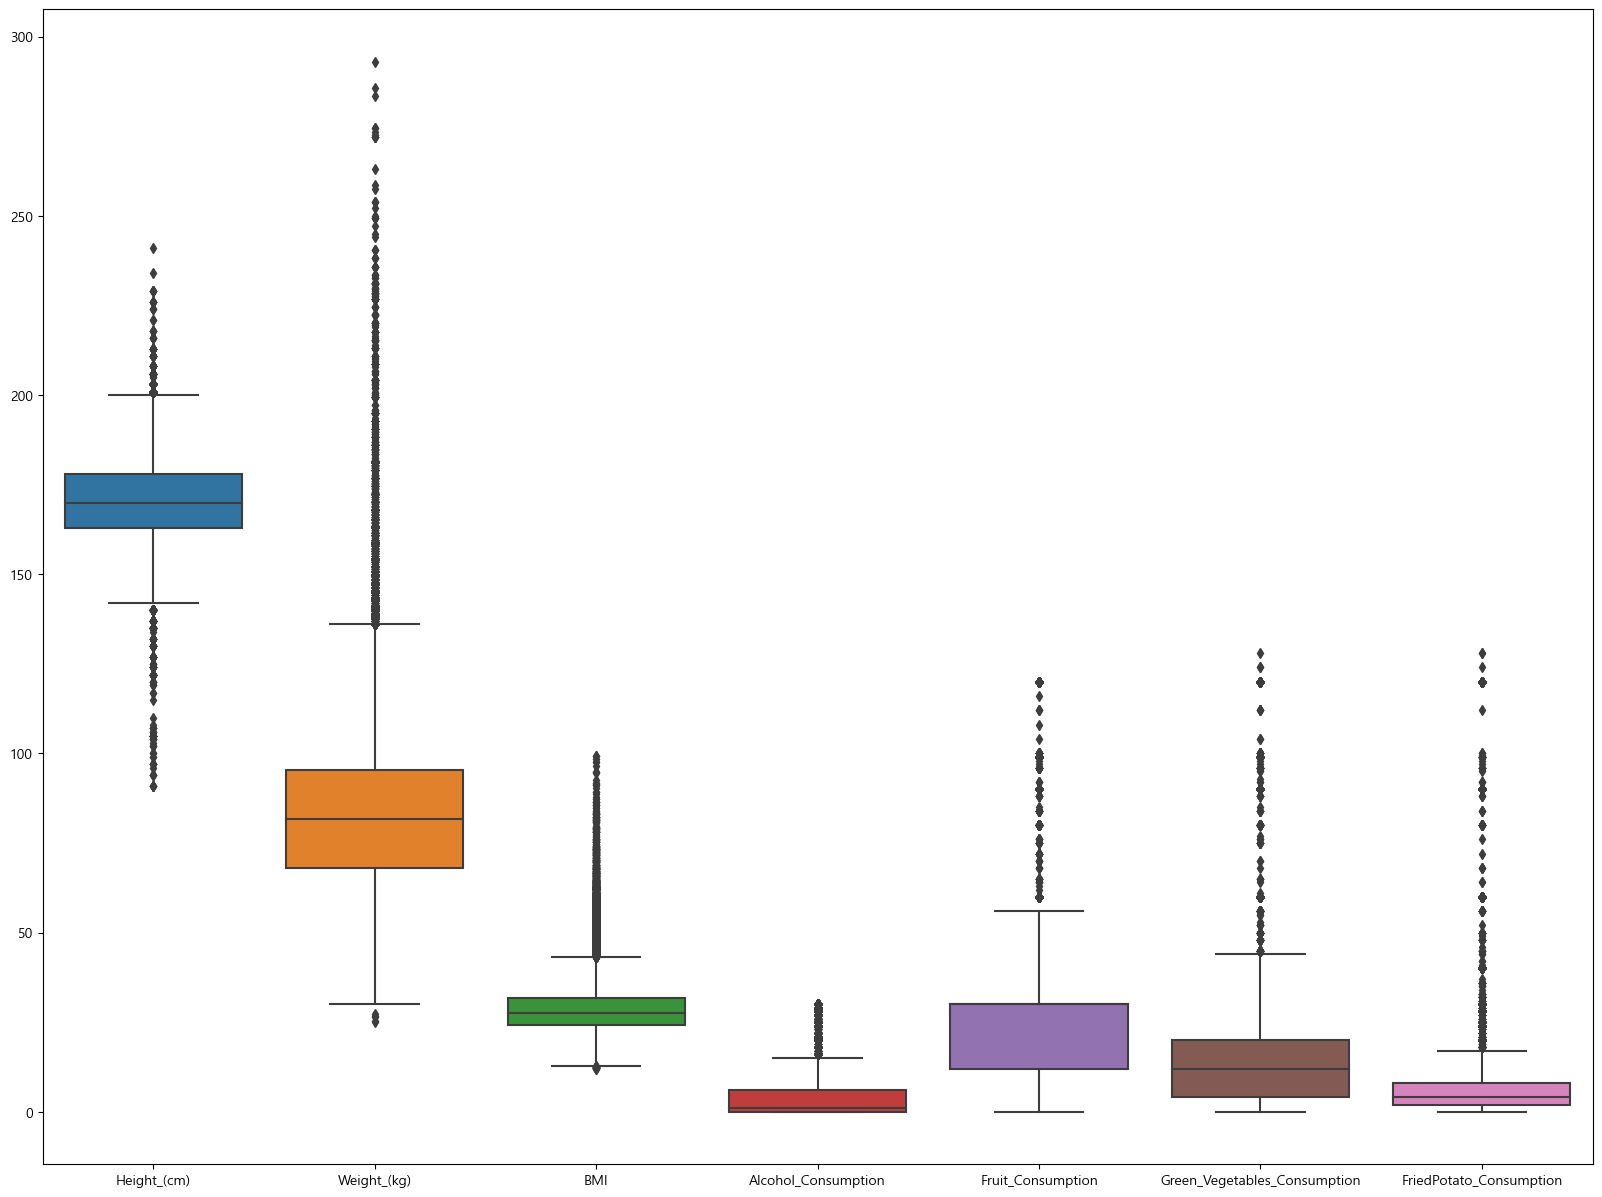

In [15]:
plt.figure(figsize=(20,15))
sns.boxplot(data=health)
plt.show()

- min값과 max값만으로 말이 안 되는 데이터들이보임. Boxplot으로 확인. 

---

## (3) 데이터 시각화

### 질병 유무

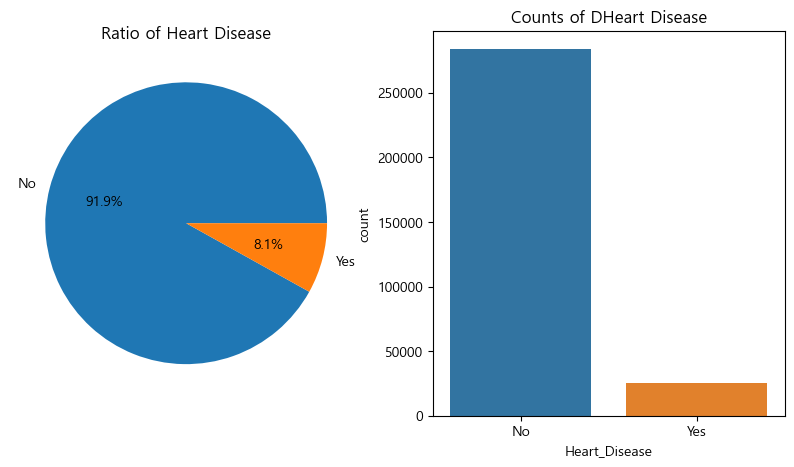

In [23]:
# Target 대상이 될 데이터 확인

hd_counts = health['Heart_Disease'].value_counts()

f, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].pie(hd_counts, autopct='%1.1f%%', labels=hd_counts.index)
ax[0].set_title('Ratio of Heart Disease')

sns.countplot(data=health, x='Heart_Disease', ax=ax[1])
ax[1].set_title('Counts of DHeart Disease')
ax[0].set_ylabel('')

plt.show()

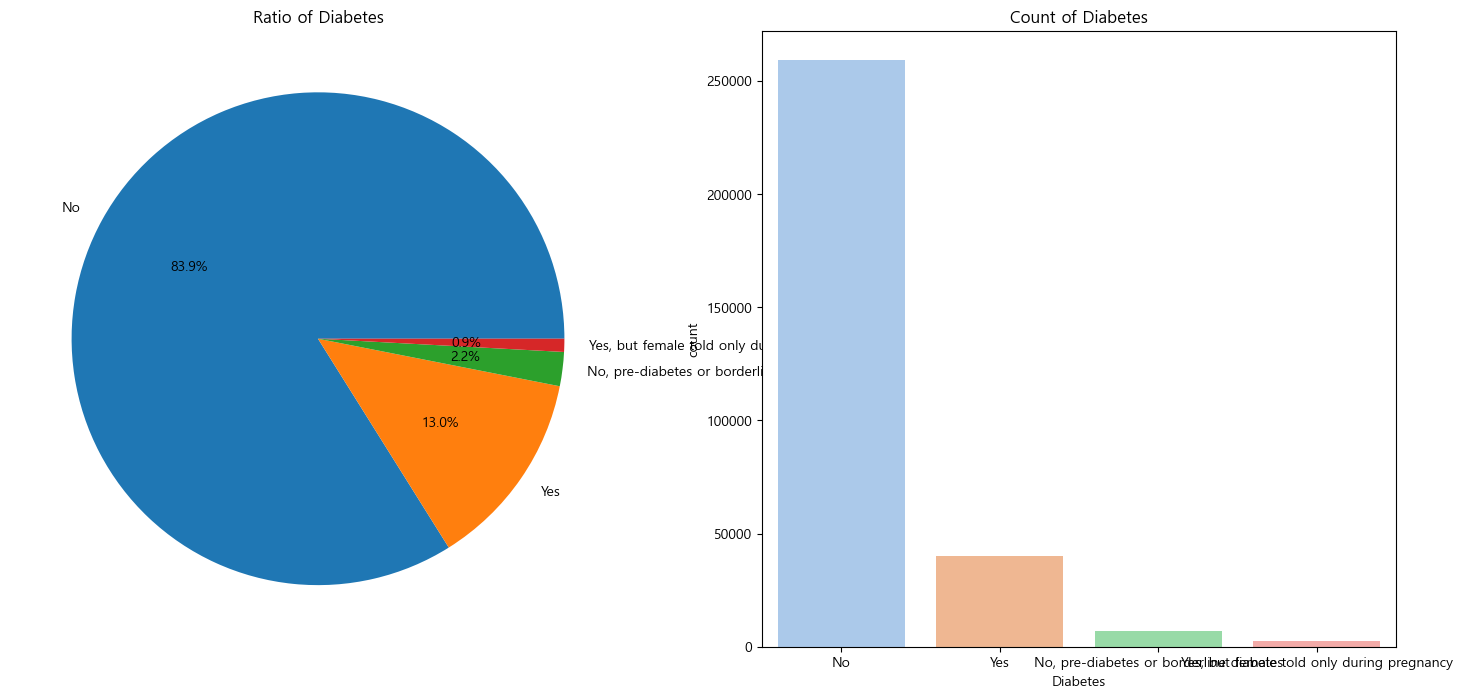

In [18]:

diabetes_counts = health['Diabetes'].value_counts()

f, ax = plt.subplots(1,2, figsize=(18,8))

ax[0].pie(diabetes_counts, autopct='%1.1f%%', labels=diabetes_counts.index)
ax[0].set_title('Ratio of Diabetes')

sns.countplot(data=health, x='Diabetes', palette='pastel', ax=ax[1])
ax[1].set_title('Count of Diabetes')
ax[0].set_ylabel('')

plt.show()

- 'Yes, but female told only during pregnancy', 'No, pre-diabetes or borderline diabetes' 비율이 너무 낮아 의미 없다고 판단하여 각각 Yes/No에 포함하기로 판단함

In [4]:
health['Diabetes'] = health['Diabetes'].replace('Yes, but female told only during pregnancy', 'Yes')
health['Diabetes'] = health['Diabetes'].replace('No, pre-diabetes or borderline diabetes', 'No')

In [19]:
health['Diabetes'].unique()

array(['No', 'Yes'], dtype=object)

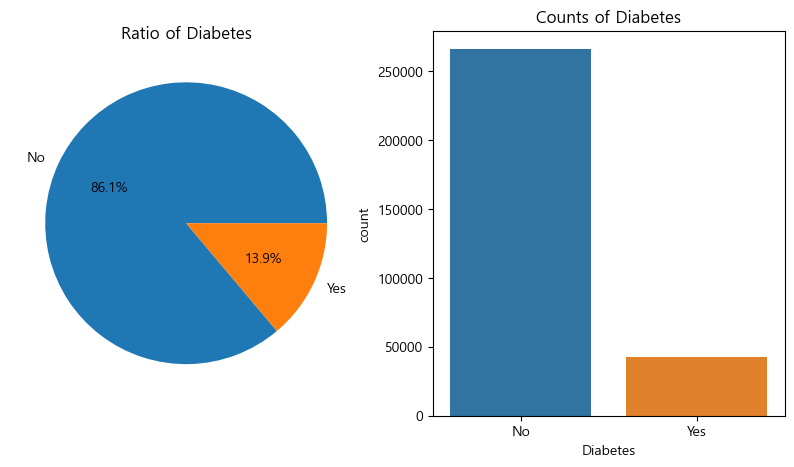

In [22]:
diabetes_counts = health['Diabetes'].value_counts()

f, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].pie(diabetes_counts, autopct='%1.1f%%', labels=diabetes_counts.index)
ax[0].set_title('Ratio of Diabetes')

sns.countplot(data=health, x='Diabetes', ax=ax[1])
ax[1].set_title('Counts of Diabetes')
ax[0].set_ylabel('')

plt.show()

### 성별과 심장병의 관계

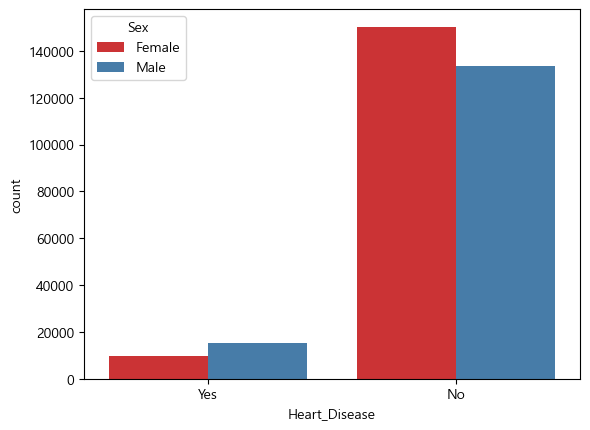

In [25]:
# 성별 질병 분포

order = ['Yes', 'No']

sns.countplot(data=health, x='Heart_Disease', order=order, hue='Sex', palette='Set1')
plt.show()


- 남녀에 따른 심장병 차이에는 큰 상관이 없어보인다.

### 나이와 심장병의 관계

In [26]:
age_order_5yrs = sorted(health['Age_Category'].unique())
age_order_5yrs

['18-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-79',
 '80+']

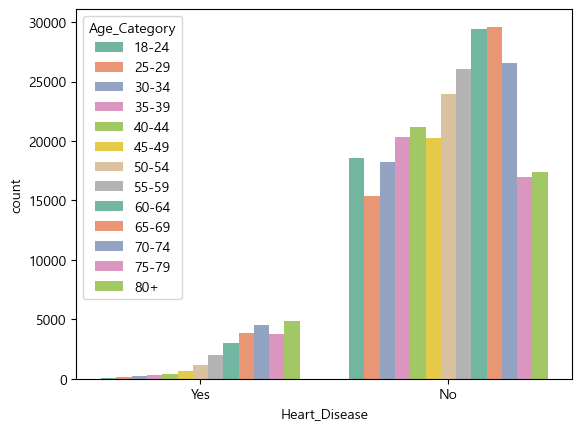

In [29]:
# 연령대에 따른 심장병 환자들의 분포도  

order = ['Yes', 'No']


sns.countplot(data=health, x='Heart_Disease', order=order, hue='Age_Category', hue_order=age_order_5yrs, palette='Set2')
plt.show()


- 연령대를 10년 단위로 구분해도 되겠다는 판단이 섰다. 그래서 심장병에 걸린 환자들의 연령대를 10년 단위로 구분해서 카테고리화 해주었다.

In [30]:
# 연령대 순서 확인

print(sorted(health['Age_Category'].unique()), end='')

['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

In [5]:
# 연령대 이름 수정하기

age_range = []

for idx, row in health.iterrows():
    
        if row['Age_Category'][0]=='1' or row['Age_Category'][0]=='2':
            tmp = "20's"
        elif row['Age_Category'][0] == '3':
            tmp = "30's"
        elif row['Age_Category'][0] == '4':
            tmp = "40's"
        elif row['Age_Category'][0] == '5':
            tmp = "50's"
        elif row['Age_Category'][0] == '6':
            tmp = "60's"
        elif row['Age_Category'][0] == '7':
            tmp = "70's"
        else:
            tmp = "80+"
        
        age_range.append(tmp)

# 10년 단위 연령대를 새로운 컬럼에 할당
health['Age_Range'] = age_range
health.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Range
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,70's
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,70's
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,60's
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,70's
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,80+


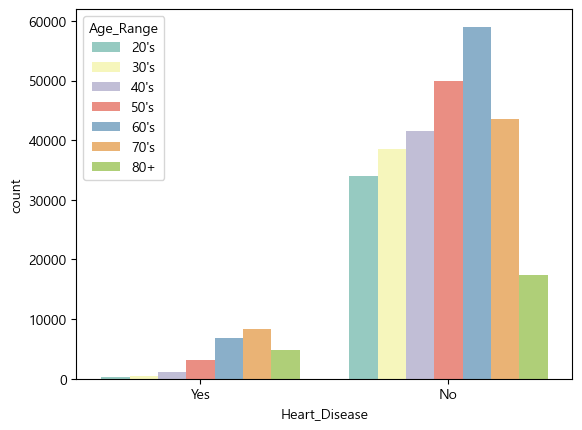

In [33]:
# 연령대 순서
age_order = ["20's", "30's", "40's", "50's", "60's", "70's", "80+"]
order = ['Yes', 'No']

# 연령대에 따른 질병 분포 

sns.countplot(data=health, x='Heart_Disease', order=order, hue='Age_Range', hue_order=age_order, palette='Set3')
plt.show()

### BMI와 심장병의 관계



- USA
    - ~18.5: 저체중(underweight)
    - 18.5 ~ 25 : 정상(normal weight)
    - 25 ~ 30 : 과제충(over weight)
    - 30 ~ 35: 경도 비만(obesity class1)
    - 35 ~ 40: 중등도 비만(obesity class2)
    - 40 ~ : 고도비만(obesity class3)


In [6]:
# BMI 지수를 미국 BMI 기준으로 나눠서 카테고리화

BMI_range = []

for idx, row in health.iterrows():
    if row['BMI'] < 18.5:
        tmp = 'Underweight'
    elif row['BMI'] >= 18.5 and row['BMI'] < 25:
        tmp = 'Nomal Weight'
    elif row['BMI'] >= 25 and row['BMI'] < 30:
        tmp = 'Over Weight'
    elif row['BMI'] >= 30 and row['BMI'] < 35:
        tmp = 'Obesity class 1'
    elif row['BMI'] >= 35 and row['BMI'] < 40:
        tmp = 'Obesity class 2'
    else:
        tmp = 'Obesity class 3'
        
    BMI_range.append(tmp)

health['BMI_Range'] = BMI_range
health.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Range,BMI_Range
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,70's,Underweight
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,70's,Over Weight
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,60's,Obesity class 1
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,70's,Over Weight
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,80+,Nomal Weight


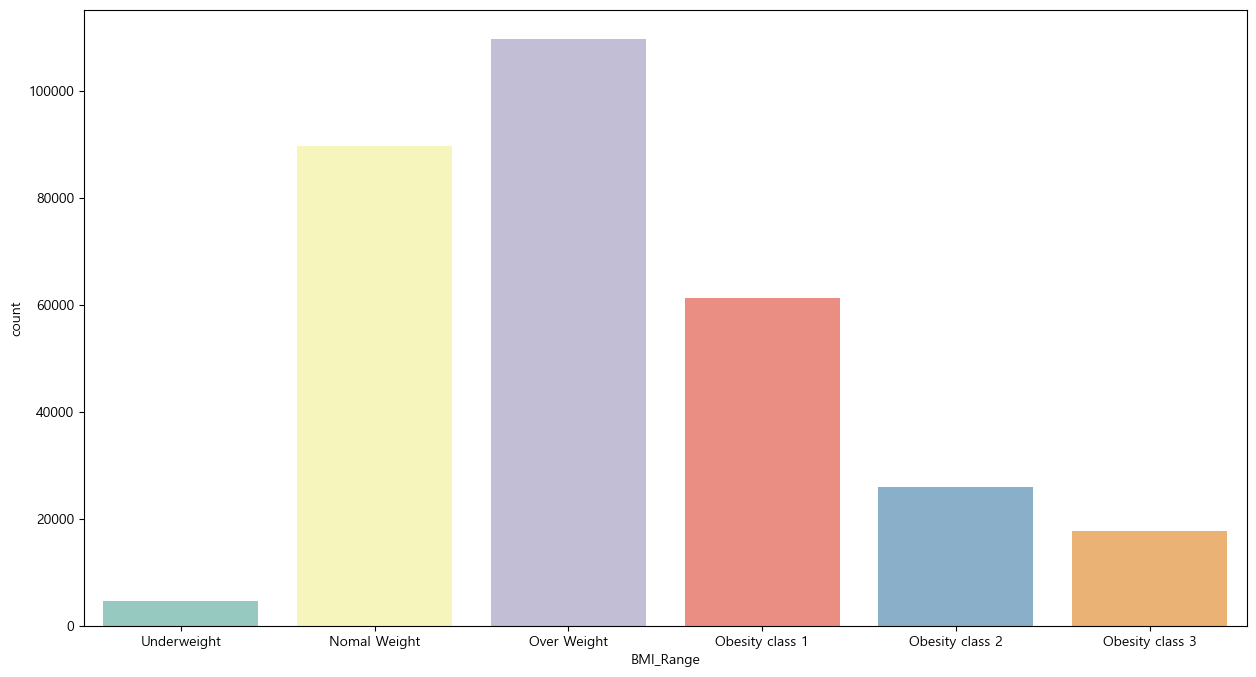

In [40]:
# BMI기준에 따라 카테고리화하였으므로 count plot을 그려봄

bmi_sort = ['Underweight', 'Nomal Weight', 'Over Weight', 'Obesity class 1', 'Obesity class 2', 'Obesity class 3' ]

plt.figure(figsize=(15,8))
sns.countplot(data=health, x='BMI_Range', palette='Set3', order = bmi_sort)
plt.show()


- 저체중인 사람이 극히 드물고 과체중이 제일 많다. 정상 체중의 사람보다도 비만인의 숫자가 더 많은 것을 확인할 수 있다.

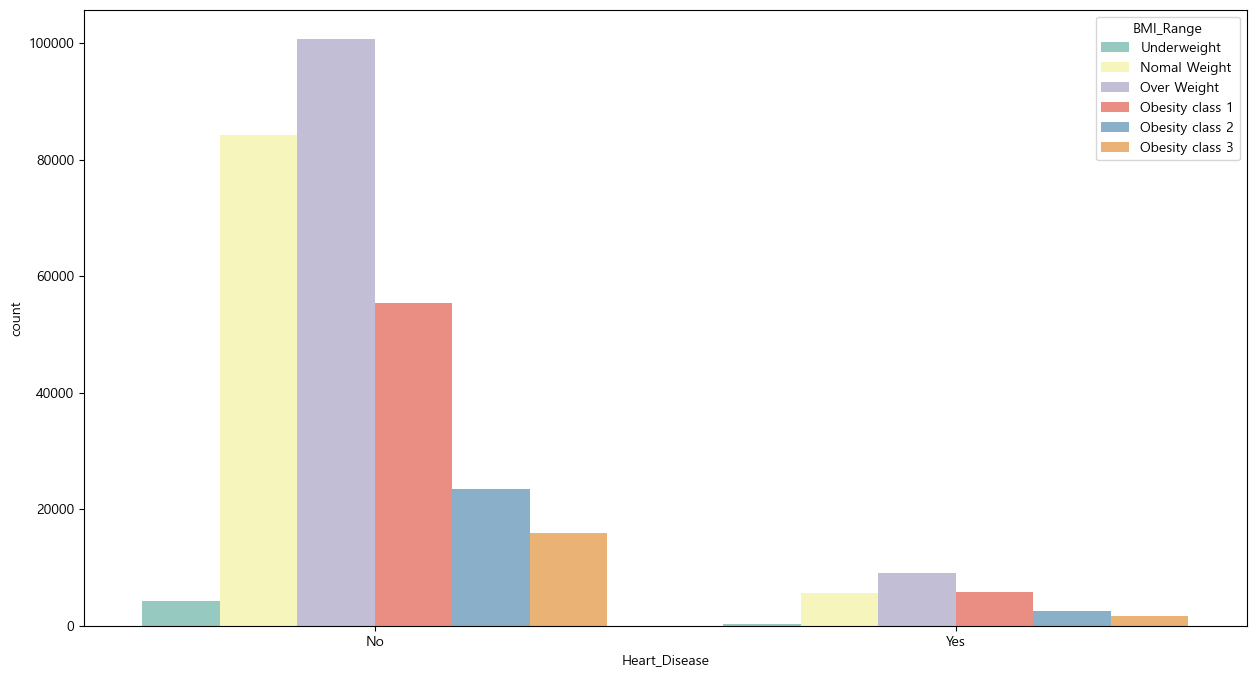

In [42]:
# BMI지수 순서
bmi_sort = ['Underweight', 'Nomal Weight', 'Over Weight', 'Obesity class 1', 'Obesity class 2', 'Obesity class 3' ]

# BMI지수에 따른 질병 분포 
plt.figure(figsize=(15,8))
sns.countplot(data=health, x='Heart_Disease', hue='BMI_Range', hue_order=bmi_sort, palette='Set3')
plt.show()

- 질병을 앓고 있는 사람의 분포와 건강한 사람의 분포가 비슷하다. 심지어 원래 BMI_Range 분포와도 비슷함.

### 운동과 심장병의 관계

In [43]:
health['Exercise'].unique()

array(['No', 'Yes'], dtype=object)

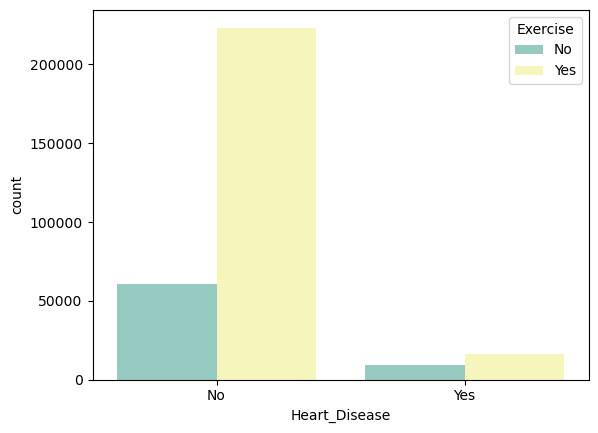

In [9]:
# 운동 여부에 따른 질병 분포 

sns.countplot(data=health, x='Heart_Disease', hue='Exercise',palette='Set3')
plt.show()

- 환자의 경우는 운동을 하고 있는 사람과 하지 않는 사람의 차이가 크지는 않지만, 반면 건강한 사람의 경우에는 운동을 하는 사람의 숫자가 압도적으로 큰 것을 확인할 수 있다.

### 흡연과 심장병의 관계

In [104]:
health['Smoking_History'].unique()

array(['Yes', 'No'], dtype=object)

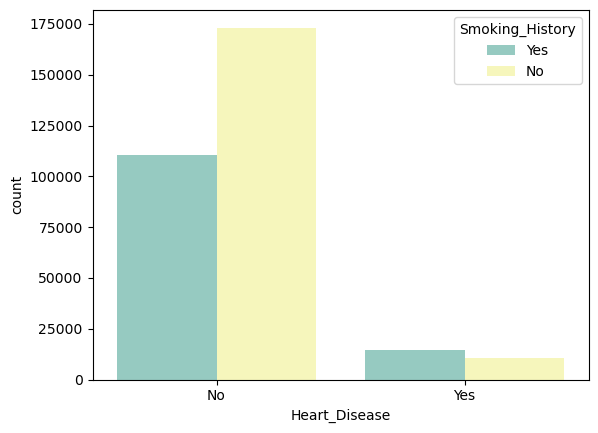

In [19]:
# 운동 여부에 따른 질병 분포 

sns.countplot(data=health, x='Heart_Disease', hue='Smoking_History', palette='Set3')
plt.show()

- 역시 질병을 앓고 있는 사람의 경우는차이가 미미하지만, 건강한 사람의 경우는 비흡연자의 수가 더 많은 것이 확인된다.

### 채소섭취-과일섭취와 심장병의 관계

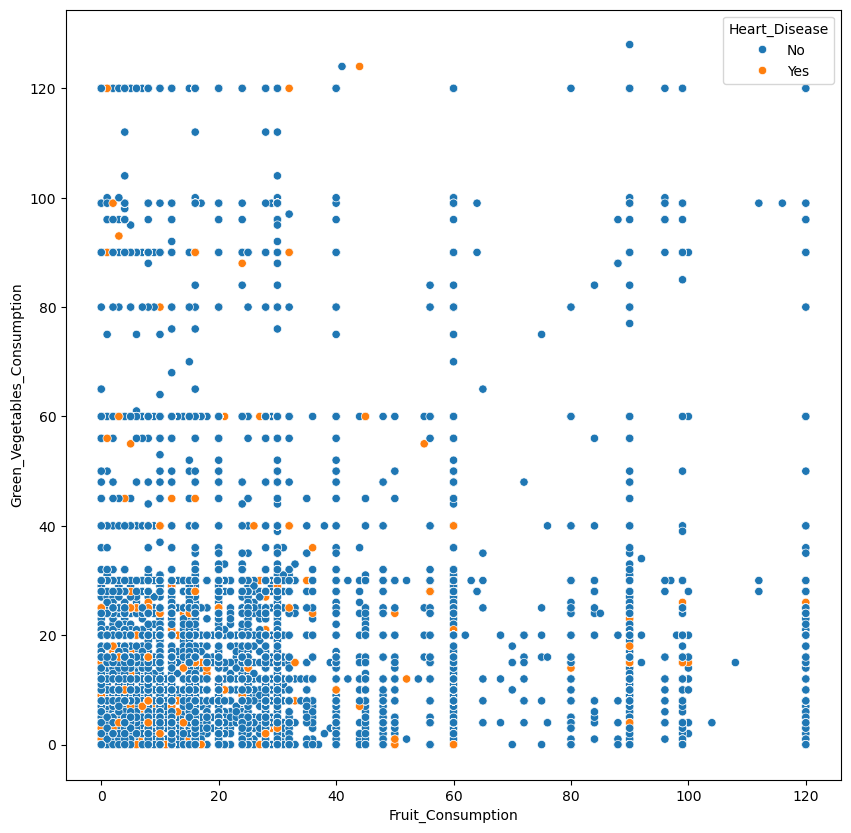

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Fruit_Consumption', y='Green_Vegetables_Consumption', hue='Heart_Disease',data=health)
plt.show()

In [10]:
health[['Green_Vegetables_Consumption', 'Fruit_Consumption']].corr()

,Green_Vegetables_Consumption,Fruit_Consumption
Green_Vegetables_Consumption,1.00000,0.27043
Fruit_Consumption,0.27043,1.00000


- 두 컬럼의 관계를 scatter plot과 상관관계로 확인한 결과 양의 관계라는 것을 확인할 수 있었다. 따라서 두 컬럼을 간단하게 하나의 컬럼으로 합쳐서 주었다.

In [18]:
health['Vegetables_Fruit_Consumption'] = (health['Green_Vegetables_Consumption'] + health['Fruit_Consumption'])
health.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Range,BMI_Range,Vegetables_Fruit_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,32.66,14.54,Yes,0.0,30.0,16.0,12.0,70's,Underweight,46.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,77.11,28.29,No,0.0,30.0,0.0,4.0,70's,Over Weight,30.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,88.45,33.47,No,4.0,12.0,3.0,16.0,60's,Obesity class 1,15.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,93.44,28.73,No,0.0,30.0,30.0,8.0,70's,Over Weight,60.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,88.45,24.37,Yes,0.0,8.0,4.0,0.0,80+,Nomal Weight,12.0


### 알코올 섭취와 심장병의 관계

In [10]:
health.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Age_Range',
       'BMI_Range'],
      dtype='object')

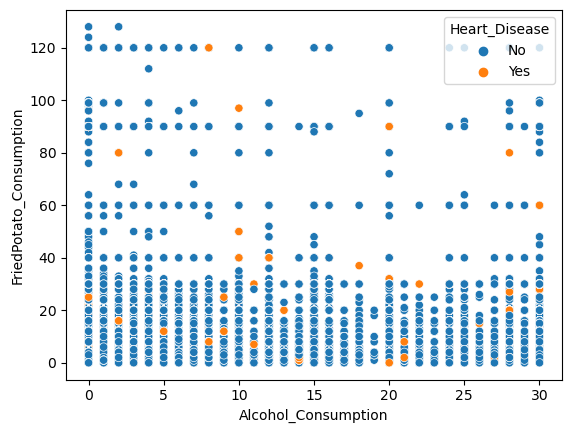

In [18]:
sns.scatterplot(x='Alcohol_Consumption', y='FriedPotato_Consumption', hue='Heart_Disease', data=health)
plt.show()

In [12]:
health[['Alcohol_Consumption', 'FriedPotato_Consumption']].corr()

,Alcohol_Consumption,FriedPotato_Consumption
Alcohol_Consumption,1.000000,0.020543
FriedPotato_Consumption,0.020543,1.000000


- 두 컬럼의 관계 및 두 컬럼과 심장병의 관계를 살펴보았다. 알코올 섭취량과 감자튀김 섭취량에는 그래프와 상관관계에서 확인하듯 큰 연관관계는 없어보인다. 하지만 두 데이터 모두 적게 섭취하는 사람일수록 심장병에 걸리지 않은 사람의 분포가 조금 더 많은 것을 확인할 수 있다.

### 주관적인 건강상태와 심장병의 관계 


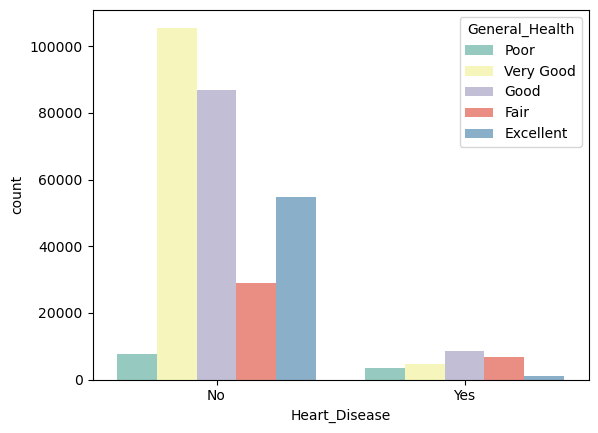

In [21]:
# 주관적인 건강상태와 심장병의 관계 - countplot

sns.countplot(data=health, x='Heart_Disease', hue='General_Health', palette='Set3')
plt.show()

- 확실히 심장질환이 없는 사람일수록 본인의 건강상태가 좋다고 생각하는 비율이 높다.

### 건강검진과 심장병의 관계

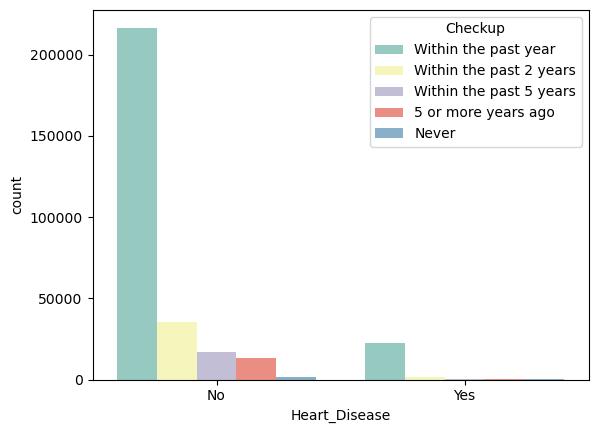

In [23]:
# 건강검진과 심장병의 관계 - countplot

checkup_order = ['Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago', 'Never']

sns.countplot(data=health, x='Heart_Disease', hue='Checkup', hue_order = checkup_order, palette='Set3')
plt.show()

- 심장질환이 없는 사람일수록 가장 최근(1년 이내)에 건강검진을 받은 사람이 압도적인 숫자로 많다. 하지만 해당 질환을 앓고 있는 사람 내에서도 최근 건강검진을 많은 사람의 숫자가 아주 큰 숫자로 많기 때문에 조심해야할 것 같다.

### 다른 질환과 심장병의 관계

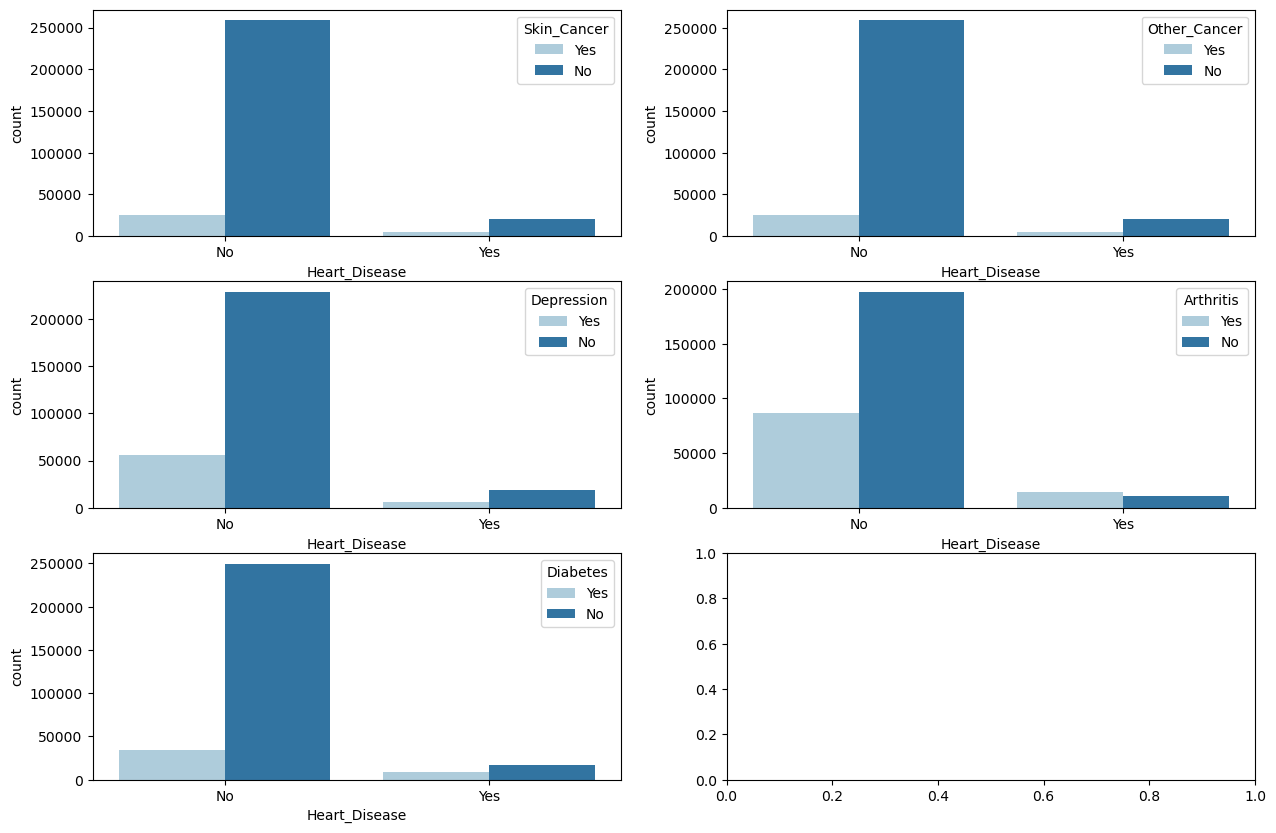

In [25]:
# 다른 질환과 심장병의 관계 - counplot

order = ['Yes', 'No']

f, ax = plt.subplots(3,2, figsize=(15,10))

sns.countplot(data=health, x='Heart_Disease', hue='Skin_Cancer', hue_order = order, ax=ax[0,0], palette='Paired')
sns.countplot(data=health, x='Heart_Disease', hue='Other_Cancer', hue_order = order, ax=ax[0,1], palette='Paired')

sns.countplot(data=health, x='Heart_Disease', hue='Depression', hue_order = order, ax=ax[1,0], palette='Paired')
sns.countplot(data=health,x='Heart_Disease',  hue='Arthritis', hue_order = order, ax=ax[1,1], palette='Paired')

sns.countplot(data=health,x='Heart_Disease',  hue='Diabetes', hue_order = order, ax=ax[2,0], palette='Paired')

plt.show()

- 딱히 심장병을 앓는다고 다른 질환을 같이 앓지는 않아보인다. 그나마 관절염(Arthritis)이 다른 데이터에 비해 수치가 조금 더 두드러지지만 미미한 정도이다. 그보다는 심장 질환이 없는 사람일수록 다른 질환도 없는 사람의 수가 큰 것으로 보인다. 

In [26]:
health.head(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Range,BMI_Range,Vegetables_Fruit_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,32.66,14.54,Yes,0.0,30.0,16.0,12.0,70's,Underweight,46.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,77.11,28.29,No,0.0,30.0,0.0,4.0,70's,Over Weight,30.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,88.45,33.47,No,4.0,12.0,3.0,16.0,60's,Obesity class 1,15.0


In [27]:
health.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Age_Range',
       'BMI_Range', 'Vegetables_Fruit_Consumption'],
      dtype='object')

- 범주형 데이터들이 많아서 상관관계가 아닌 시각화를 통한 데이터들의 관계를 살펴보았다. 조금이라도 의미가 있어보이는 컬럼을 골라내니 다음과 같았다.
    - General_Health
    - Checkup
    - Alcohol_Consumption
    - FriedPotato_Consumption
    - Age_Range
    - BMI_Range (키와 몸무게 컬럼은 BMI로 계산되므로 생략함)
    - Vegetables_Fruit_Consumption


---